In [17]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file_chrom(vcf_file_address):
    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file, one chrom
    input: vcf file
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """

    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_list=[]  
    
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]            # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                           # genomic position of variants
            var_pos_list.append(var_pos)
    return var_pos_list


In [70]:
folder = "/scratch/smajidi1/hac/"
vcf_file_address = folder+ "hprc_chr22.vcf"
var_pos_list = read_vcf_file_chrom(vcf_file_address)

diff_list = []
for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    diff_list.append(diff)
    
print("Number of variants in the VCF is ",len(diff_list)+1)
print("Mean of genomic distance", round(np.mean(diff_list),3),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

print("Max could be due to N positions.")


Number of variants in the VCF is  98943
Mean of genomic distance 407.288 bp, max distance 2512818 bp, and min distance is 1
Max could be due to N positions.


In [79]:
max_value=np.max(diff_list)
for i in range(1,len(var_pos_list)):
    diff = var_pos_list[i]-var_pos_list[i-1]
    if diff== max_value:
        print("The max distance is happening between variants indecis",i-1,"and the next one, which are at positions",var_pos_list[i-1],"and", var_pos_list[i])


The max distance is happening between variants indecis 18266 and the next one, which are at positions 12641590 and 15154408


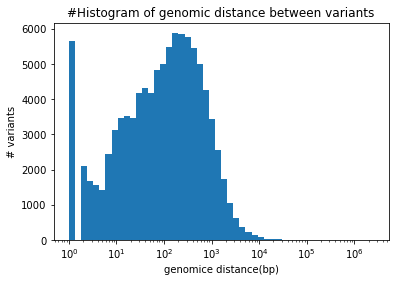

In [80]:
hist, bins = np.histogram(diff_list, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(diff_list, bins=logbins)
plt.xscale('log')

plt.title('#Histogram of genomic distance between variants')
plt.xlabel("genomice distance(bp)")
plt.ylabel("# variants")
plt.show()

Text(0, 0.5, '# variants')

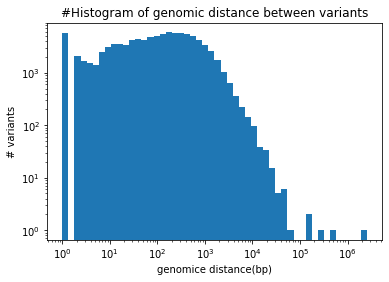

In [81]:
hist, bins = np.histogram(diff_list, bins=50)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(diff_list, bins=logbins)
plt.loglog()

plt.title('#Histogram of genomic distance between variants')
plt.xlabel("genomice distance(bp)")
plt.ylabel("# variants")


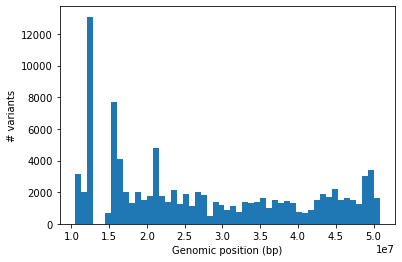

In [82]:

step= 1e6
num_bucket= int(np.max(var_pos_list)/step)+1


plt.hist(var_pos_list, bins=num_bucket)
plt.ylabel("# variants")
plt.xlabel("Genomic position (bp)")
plt.show()


In [100]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file(vcf_file_address):
    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file
    input: ordered vcf file (based on chr and position)
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """

    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_chrom_list = []
    var_pos_allchrom_list = []
    chrom_list=[]
    
    previous_chrom  = ""
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]       # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                       # genomic position of variants
            
            if chrom != previous_chrom:                        # new chromosome started  in the VCF file
                chrom_list.append(chrom)
                if var_pos_chrom_list:           # not empty
                    var_pos_allchrom_list.append(var_pos_chrom_list)                
                var_pos_chrom_list = [var_pos]
            else:                                                  
                var_pos_chrom_list.append(var_pos)                
            
            previous_chrom = chrom
    # add the last chr
    var_pos_allchrom_list.append(var_pos_chrom_list)                
                
            
    return chrom_list, var_pos_allchrom_list


In [130]:
pwd

'/work/FAC/FBM/DBC/cdessim2/default/smajidi1'

In [131]:
folder = "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/other/hack22/"
vcf_file_address = folder+ "HPRC-cur.20211005-align2-GRCh38.dip.vcf"  #"hprc_chr22.vcf"
chrom_list, var_pos_allchrom_list = read_vcf_file(vcf_file_address)


In [109]:
len(var_pos_allchrom_list), len(var_pos_allchrom_list[0]), len(var_pos_allchrom_list[-1])

(24, 424478, 80000)

In [114]:
diff_list_allchrom =[]
for chrom_idx, chrom in enumerate(chrom_list):
    print("***")
    print("working on chr", chrom)
    var_pos_list = var_pos_allchrom_list[chrom_idx]
    diff_list = []
    for i in range(1,len(var_pos_list)):
        diff = var_pos_list[i]-var_pos_list[i-1]
        diff_list.append(diff)
        
    diff_list_allchrom.append(diff_list)
    print("Number of variants in the VCF is ",len(diff_list)+1)
    print("Mean of genomic distance", round(np.mean(diff_list),1),"bp, max distance", np.max(diff_list),"bp, and min distance is", np.min(diff_list))

    print("Max could be due to N positions.")


***
working on chr chr1
Number of variants in the VCF is  424478
Mean of genomic distance 585.1 bp, max distance 18014299 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr2
Number of variants in the VCF is  394092
Mean of genomic distance 614.5 bp, max distance 2004169 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr3
Number of variants in the VCF is  374386
Mean of genomic distance 529.5 bp, max distance 695999 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr4
Number of variants in the VCF is  387661
Mean of genomic distance 490.3 bp, max distance 534234 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr5
Number of variants in the VCF is  335899
Mean of genomic distance 540.2 bp, max distance 2652960 bp, and min distance is 1
Max could be due to N positions.
***
working on chr chr6
Number of variants in the VCF is  327966
Mean of genomic distance 520.2 bp, m

In [205]:

# dim1=6
# dim2=4

# fig = plt.figure(figsize=(dim1*6,dim2*6))
# for chrom_idx in range(len(diff_list_allchrom)):
    
#     diff_list = diff_list_allchrom[chrom_idx]
#     plt.subplot(dim1, dim2, chrom_idx+1 )

#     hist, bins = np.histogram(diff_list, bins=50)
#     logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
#     plt.hist(diff_list, bins=logbins)
#     plt.xscale('log')
#     plt.yscale('log')

#     #plt.title('#Histogram of genomic distance between variants')
#     plt.xlabel("genomice distance(bp)")
#     plt.ylabel("# variants")

# # plt.show()
# tight_layout() 
# plt.savefig(folder+"hist_chrs.pdf")

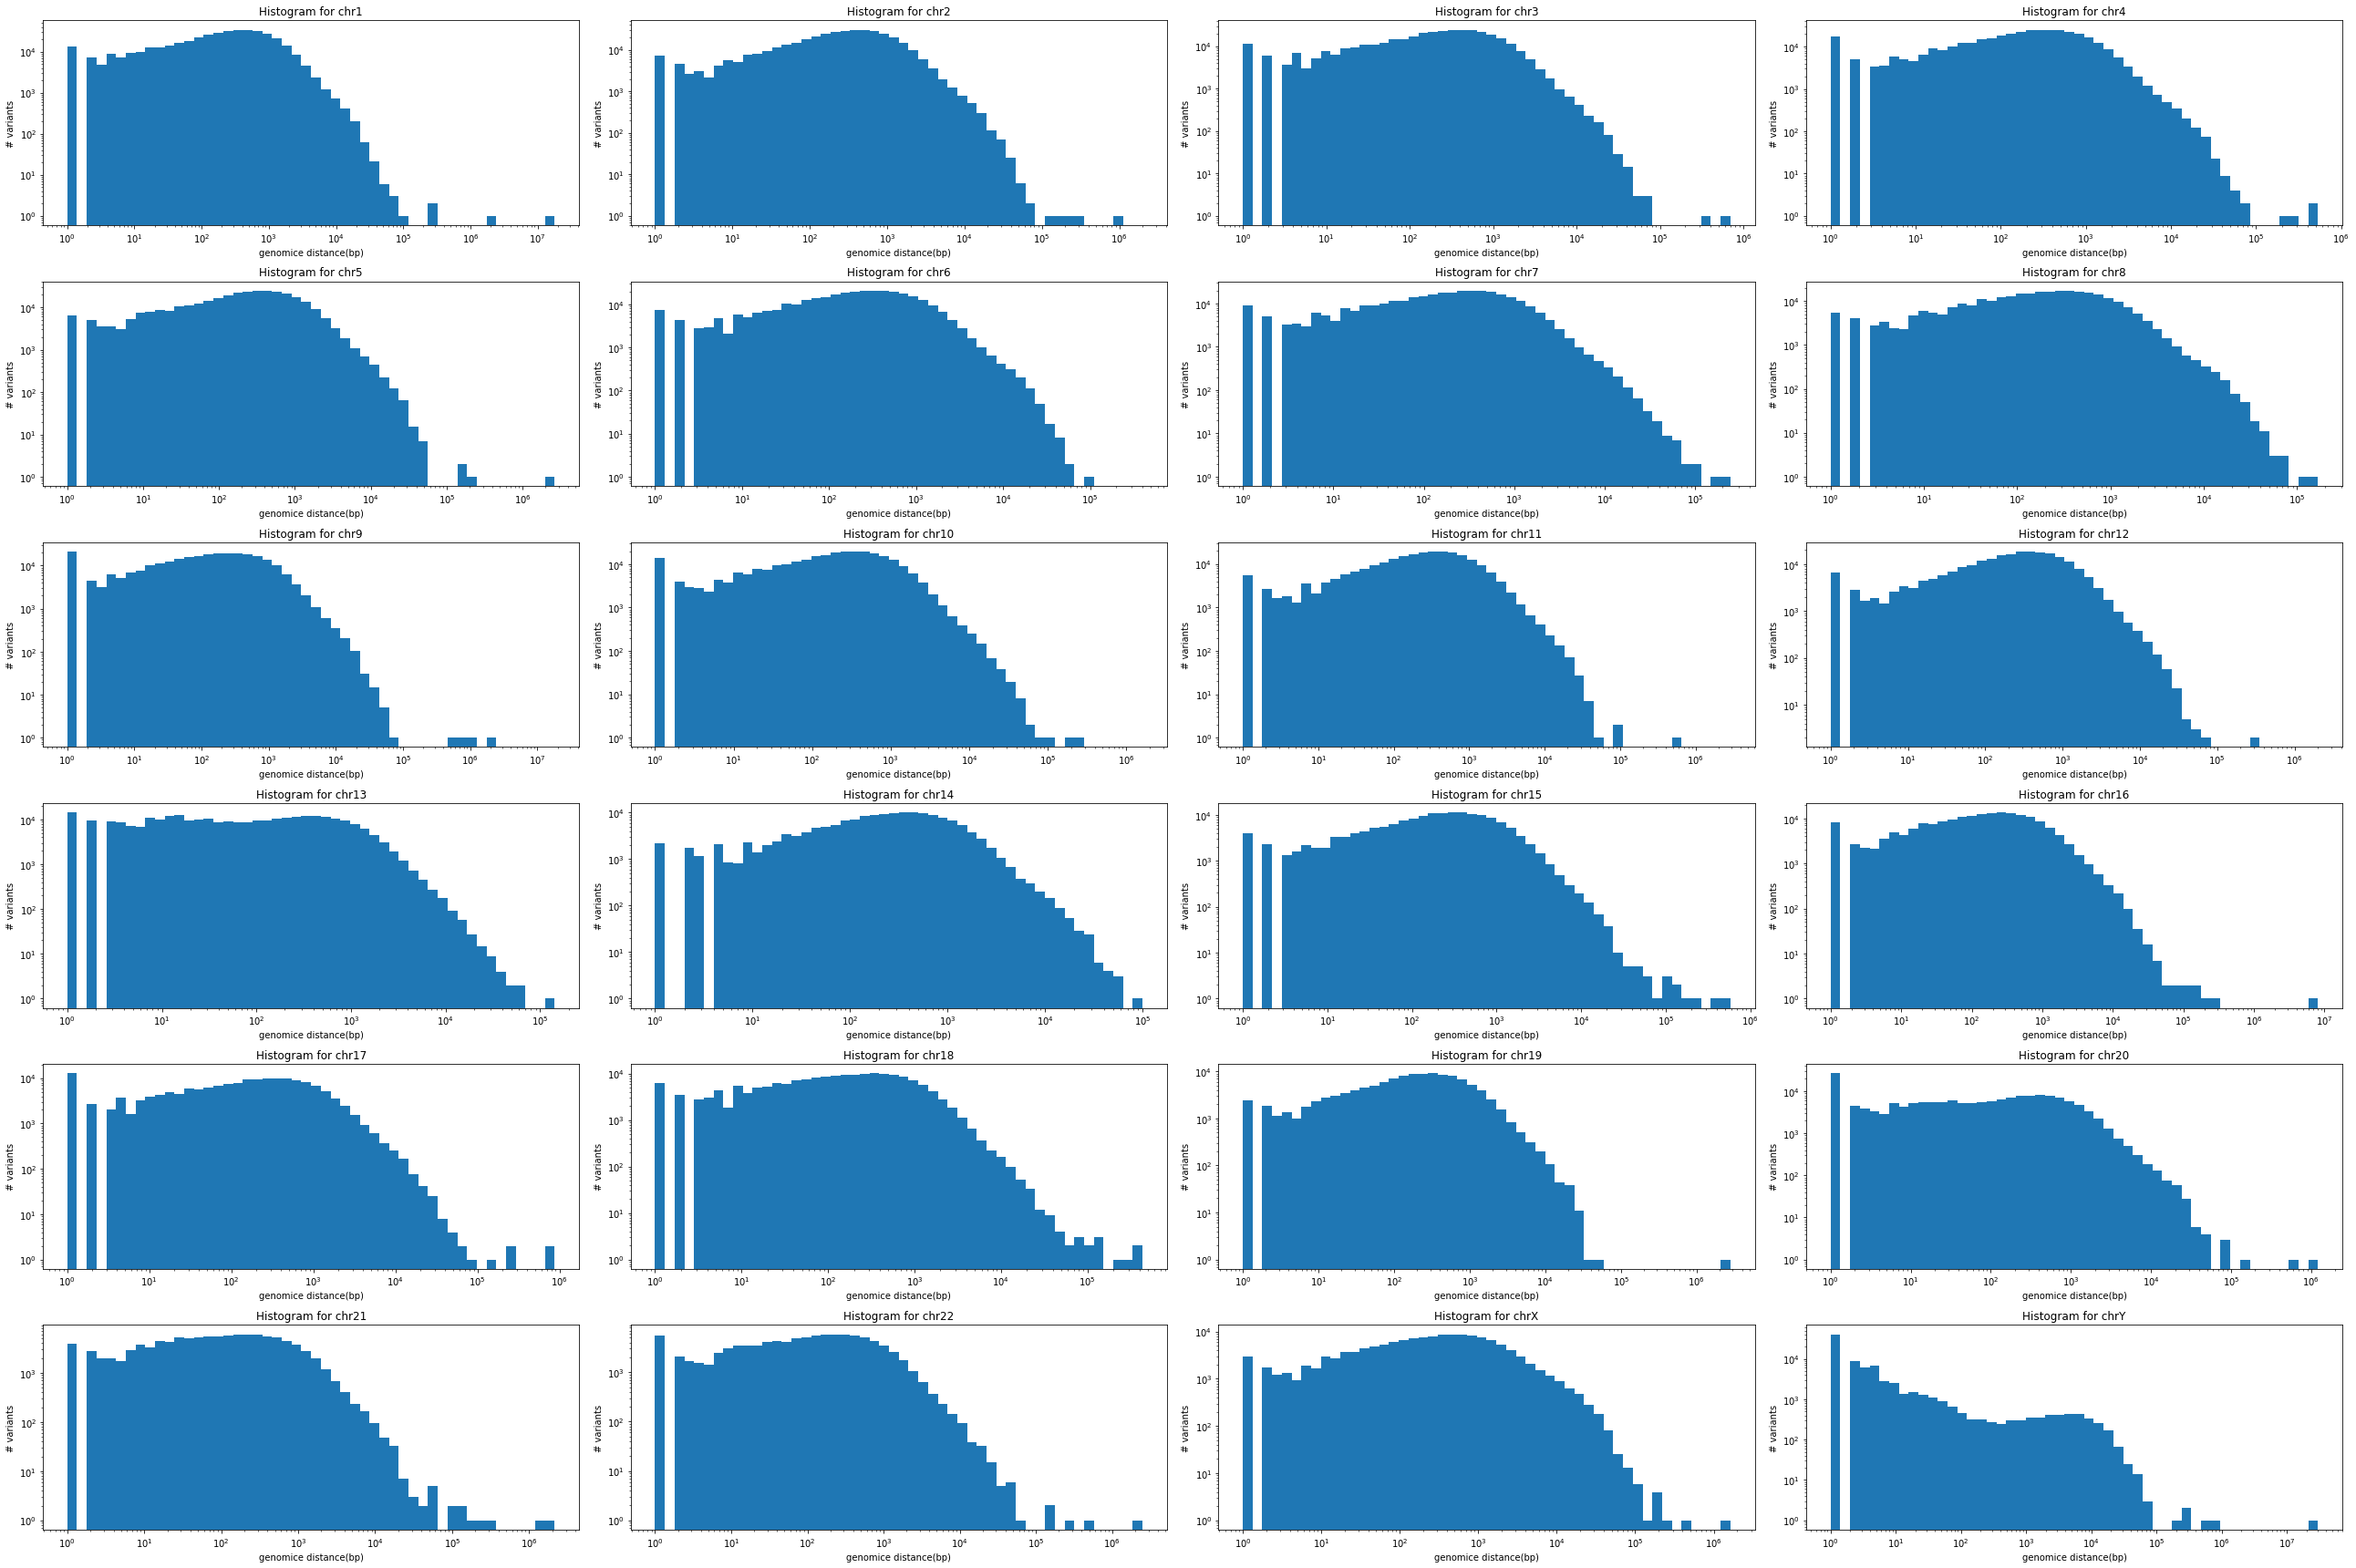

In [207]:

dim1=6
dim2=4

fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(diff_list_allchrom)):
    
    diff_list = diff_list_allchrom[chrom_idx]
    plt.subplot(dim1, dim2, chrom_idx+1 )

    hist, bins = np.histogram(diff_list, bins=50)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(diff_list, bins=logbins)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Histogram for '+str(chrom_list[chrom_idx]))

    #plt.title('#Histogram of genomic distance between variants')
    plt.xlabel("genomice distance(bp)")
    plt.ylabel("# variants")

# plt.show()
plt.tight_layout() 
plt.savefig(folder+"hist_chrs_variant_distance2.pdf")

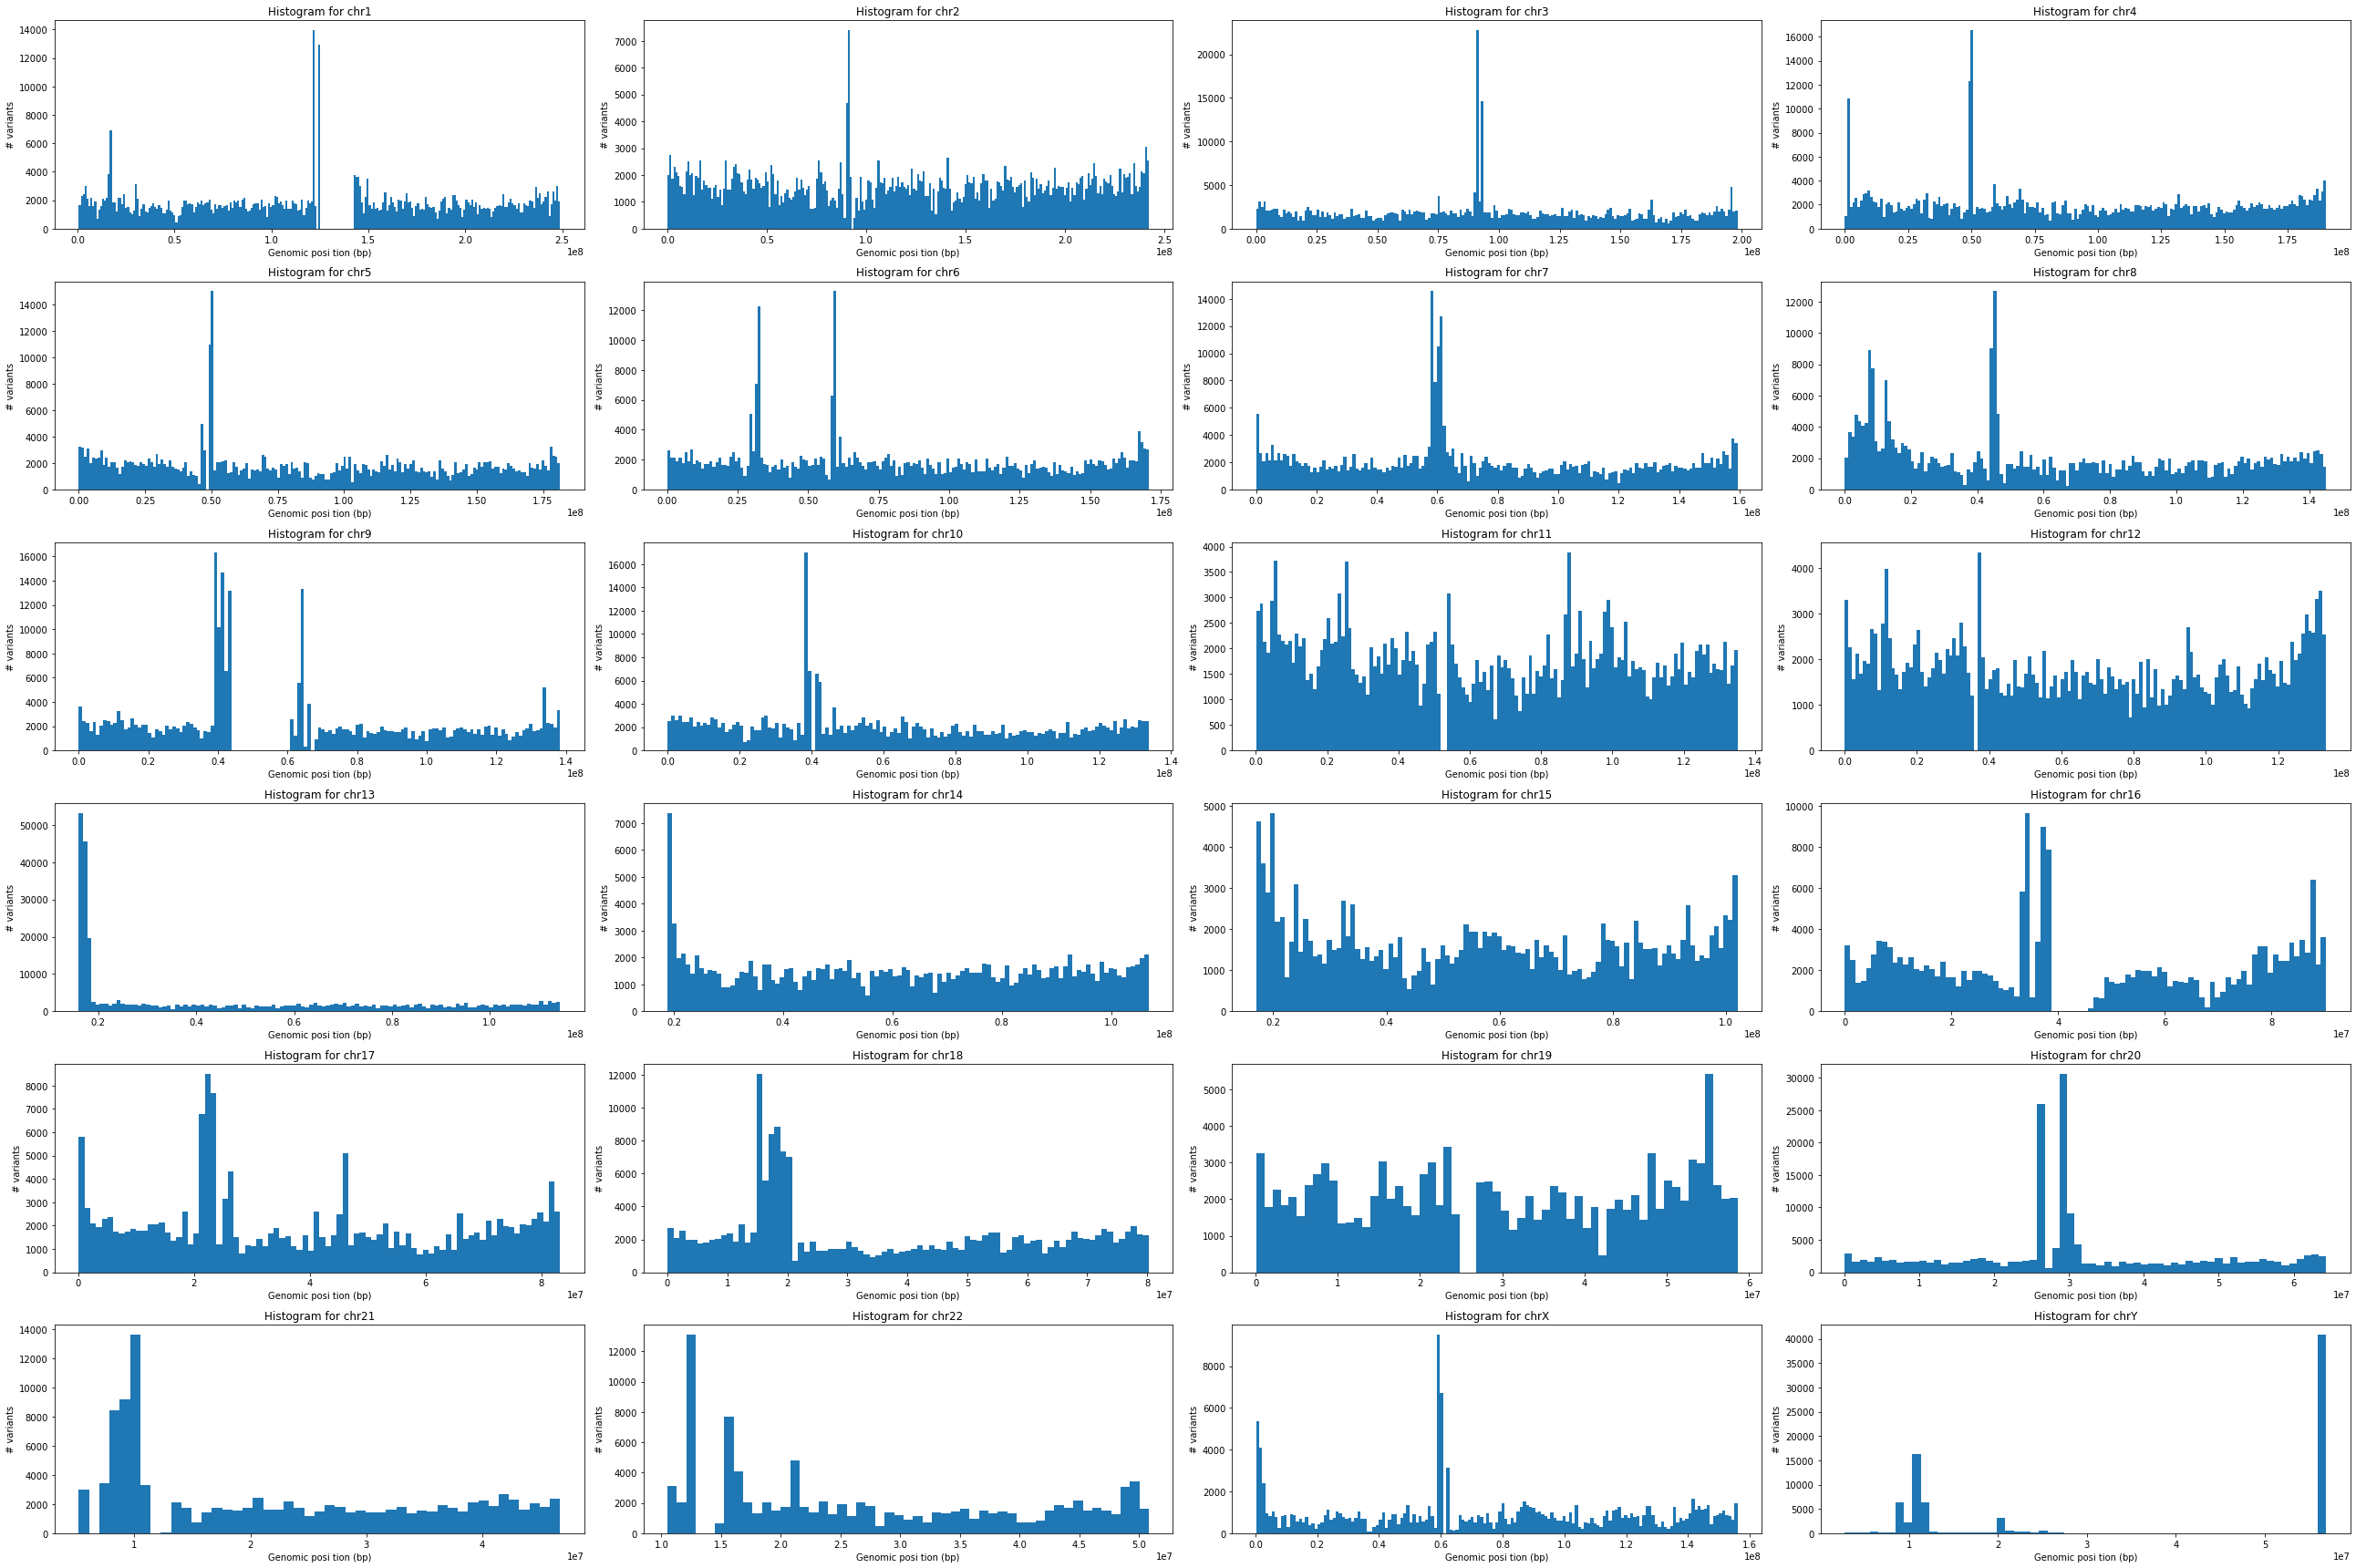

In [206]:
step= 1e6

dim1=6
dim2=4
fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(var_pos_allchrom_list)):
    var_pos_chrom = var_pos_allchrom_list[chrom_idx] 
    num_bucket= int(np.max(var_pos_chrom)/step)+1
    
    plt.subplot(dim1, dim2, chrom_idx+1 )
    plt.hist(var_pos_chrom, bins=num_bucket)
    plt.ylabel("# variants")
    plt.xlabel("Genomic posi tion (bp)")
    plt.title('Histogram for '+str(chrom_list[chrom_idx]))

#plt.show()
plt.tight_layout() 

plt.savefig(folder+"hist_chrs_variant_position2.pdf")

# finding cluster of variants

In [221]:
var_pos_list = var_pos_allchrom_list[22-1]


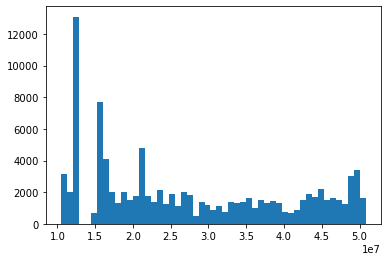

In [222]:
plt.hist(var_pos_list, bins=51)
plt.show()



In [228]:
from sklearn.cluster import MeanShift

import numpy as np 
bandwidth=100000

var_pos_np = np.array(var_pos_list)
var_pos_np_reshaped = var_pos_np.reshape(-1, 1)

clustering = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(var_pos_np_reshaped) 
    


In [229]:
clusters_labels=clustering.labels_
# cluster labels are not in order, the first one may be 1, next 0 next 2!  # array([1, 1, 0, 0, 0, 2, 2])
cluster_unique, cluster_id = np.unique(clusters_labels, return_index=True)
cluster_unique_order_preserved = cluster_unique[np.argsort(cluster_id)]


In [230]:
clusters_labels[:20]

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [236]:

# for each cluster, find the boundries (start/end genomic position)
list_boundries_clusters = []
for cluster_id  in cluster_unique_order_preserved:
    indices_this_cluster = np.where(clusters_labels == cluster_id)  # indices of alleles in the combined list which are estimated to be in this cluster
    pos_this_cluster = var_pos_np[indices_this_cluster]
    start_pos_this_cluster = pos_this_cluster[0]
    end_pos_this_cluster = pos_this_cluster[-1]
    list_boundries_clusters.append([start_pos_this_cluster, end_pos_this_cluster])
len(list_boundries_clusters), list_boundries_clusters[:10]



(147,
 [[10510212, 10784614],
  [11215960, 11377746],
  [11547776, 11631069],
  [11780754, 11976156],
  [12027635, 12225568],
  [12275666, 12438435],
  [12489008, 12641590],
  [15154408, 15325997],
  [15326966, 15495264],
  [15495353, 15689199]])

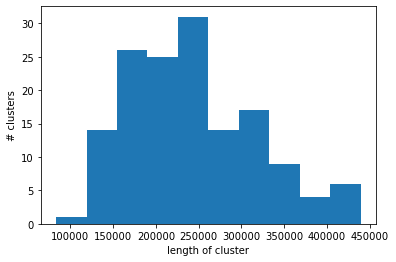

In [246]:
list_boundries_clusters_len =[i[1]-i[0] for i in list_boundries_clusters]
plt.hist(list_boundries_clusters_len)
plt.xlabel("length of cluster")
plt.ylabel("# clusters")
plt.show()

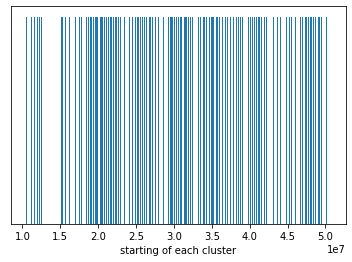

In [250]:
start_pos_clisters = [i[0] for i in list_boundries_clusters]
plt.bar(start_pos_clisters, 1, width=100000)
plt.xlabel("starting of each cluster")
plt.yticks([10])
plt.show()


# size of variant

In [ ]:
# chr22   10704716        .       G       A,GAATATATA,GAATATATATATGAATATATATGAATATATATGAATATATATGAATATATATATGAATATATATATGAATATATATGAATATATATGAATATATATATGAATATATATATGAATATATATGAATATATAT
# GAATATATATATGAATATATATGAATATATATGAATATATATGAATATATATATGAATATACATGAATATATATGAATATATATATGAATATACATGAATATATA,GAATATATATATGAATATATATGAATATATATGAATATATATGAATATATATATGAATATATATATGAATATATAT
# GAATATATATGAATATATATATGAATATATATATGAATATATATGAATATATATGAATATATATATGAATATATATGAATATATATATGAATATATATGAATATATATATGAATATACATGAATATATATGAATATATATATGAATATACATGAATATATA,* 30      HET1;HET2
#        .       GT:AD   .|.:1,4,1,1,1,2



# "chr22	10698832	.	CTTTTTTCCGCCTTCTCAGCGGCTTTTTGTCGCCACGCCTTTTTACCCCCGCCGCCGCGACTTTTCGCTCCCCGCCGCTGCAGCTTTTTGCCTCCGCGGCTTTCTTCCCCCGCCGCCGAGGCTTCTTGCGACTTTTTTCCCCCGCTGCCACGGCTTTTTGCCCCCGCCGCCGCGACTTTTGTGGATTTTTGTCCCCGCCGCCGCTGATTTTGCCCCCGCCGCCGCGGCT
# C,*	30	HET1;HET2	.	GT:AD	.|.:5,1,4"

In [164]:
import numpy as np
import matplotlib.pyplot as plt

def read_vcf_file(vcf_file_address):
    """
    Assumption: VCF for one individual and all variants are called.  
    
    Reading the vcf file
    input: ordered vcf file (based on chr and position)
    outputs:
            lines_list: list of string. each string is a line of phased vcf file.
            var_pos_list: genomic position of variants in the vcf file.
    """
    vcf_file = open(vcf_file_address,'r')
    lines_list=[]         
    var_pos_list_chrom = []
    var_pos_list_chroms = []
    chrom_list=[]
    
    var_ref_list_chrom= []
    var_ref_list_chroms= []
    var_alt_list_chrom= []
    var_alt_list_chroms= []
    
    previous_chrom  = ""
    for line in vcf_file:
        line_strip = line.strip()
        lines_list.append(line_strip)
        if line_strip.startswith('#'):
            pass
            #header_lines_list.append(line_strip)
            #sample_names = line_strip.split('\t')[9:11]       # last line of header contains sample name
        else:
            line_parts=line_strip.split('\t')
            chrom = line_parts[0]
            var_pos = int(line_parts[1])                       # genomic position of variants
            allele_ref = line_parts[3]
            allele_alt = line_parts[4]
            
            if chrom != previous_chrom:                        # new chromosome started  in the VCF file
                chrom_list.append(chrom)
                if var_pos_list_chrom:           # not empty
                    var_pos_list_chroms.append(var_pos_list_chrom)                
                    var_ref_list_chroms.append(var_ref_list_chrom)
                    var_alt_list_chroms.append(var_ref_list_chrom)
                    
                var_pos_list_chrom = [var_pos]
                var_ref_list_chrom = [allele_ref]
                var_alt_list_chrom = [allele_alt]
                
            else:                                                  
                var_pos_list_chrom.append(var_pos)
                var_ref_list_chrom.append(allele_ref)
                var_alt_list_chrom.append(allele_alt)
            
            previous_chrom = chrom
    # add the last chr
    var_pos_list_chroms.append(var_pos_list_chrom)   
    var_ref_list_chroms.append(var_ref_list_chrom)
    var_alt_list_chroms.append(var_alt_list_chrom)

            
    return chrom_list, var_pos_allchrom_list, var_ref_list_chroms, var_alt_list_chroms


In [194]:
folder = "/work/FAC/FBM/DBC/cdessim2/default/smajidi1/other/hack22/"
#vcf_file_address = folder+ "hprc_chr22.vcf"
vcf_file_address = folder+ "HPRC-cur.20211005-align2-GRCh38.dip.vcf"
chrom_list, var_pos_allchrom_list, var_ref_list_chroms, var_alt_list_chroms = read_vcf_file(vcf_file_address)


In [195]:
# var_ref_list_chroms # each ahs only one string as an allele
var_alt_list_chroms_expanded_filt =[]
for var_alt_list_chrom in var_alt_list_chroms:

    var_alt_list_chrom_expanded =[]
    for alt_vals in var_alt_list_chrom:
        alt_vals_list = alt_vals.split(",")
        var_alt_list_chrom_expanded.extend(alt_vals_list)

    # there might be several '.' or '*' as deletion  of ref allele.
    var_alt_list_chrom_expanded_filt = [i for i in var_alt_list_chrom_expanded if i !="*"]
    var_alt_list_chroms_expanded_filt.append(var_alt_list_chrom_expanded_filt)



In [196]:
var_alleles_list_chroms =[]
var_size_list_chroms =[]
for i in range(len(var_ref_list_chroms)):
    
    var_alleles_list_chrom = var_alt_list_chroms_expanded_filt[i]  + var_ref_list_chroms[i]
    var_alleles_list_chroms.append(var_alleles_list_chrom)
    
    var_size_list_chrom = [len(i) for i in var_alleles_list_chrom] # "A"  "AGCCC"
    var_size_list_chroms.append(var_size_list_chrom)

print(len(var_alleles_list_chroms), len(var_alleles_list_chroms[0]))
    

24 848956


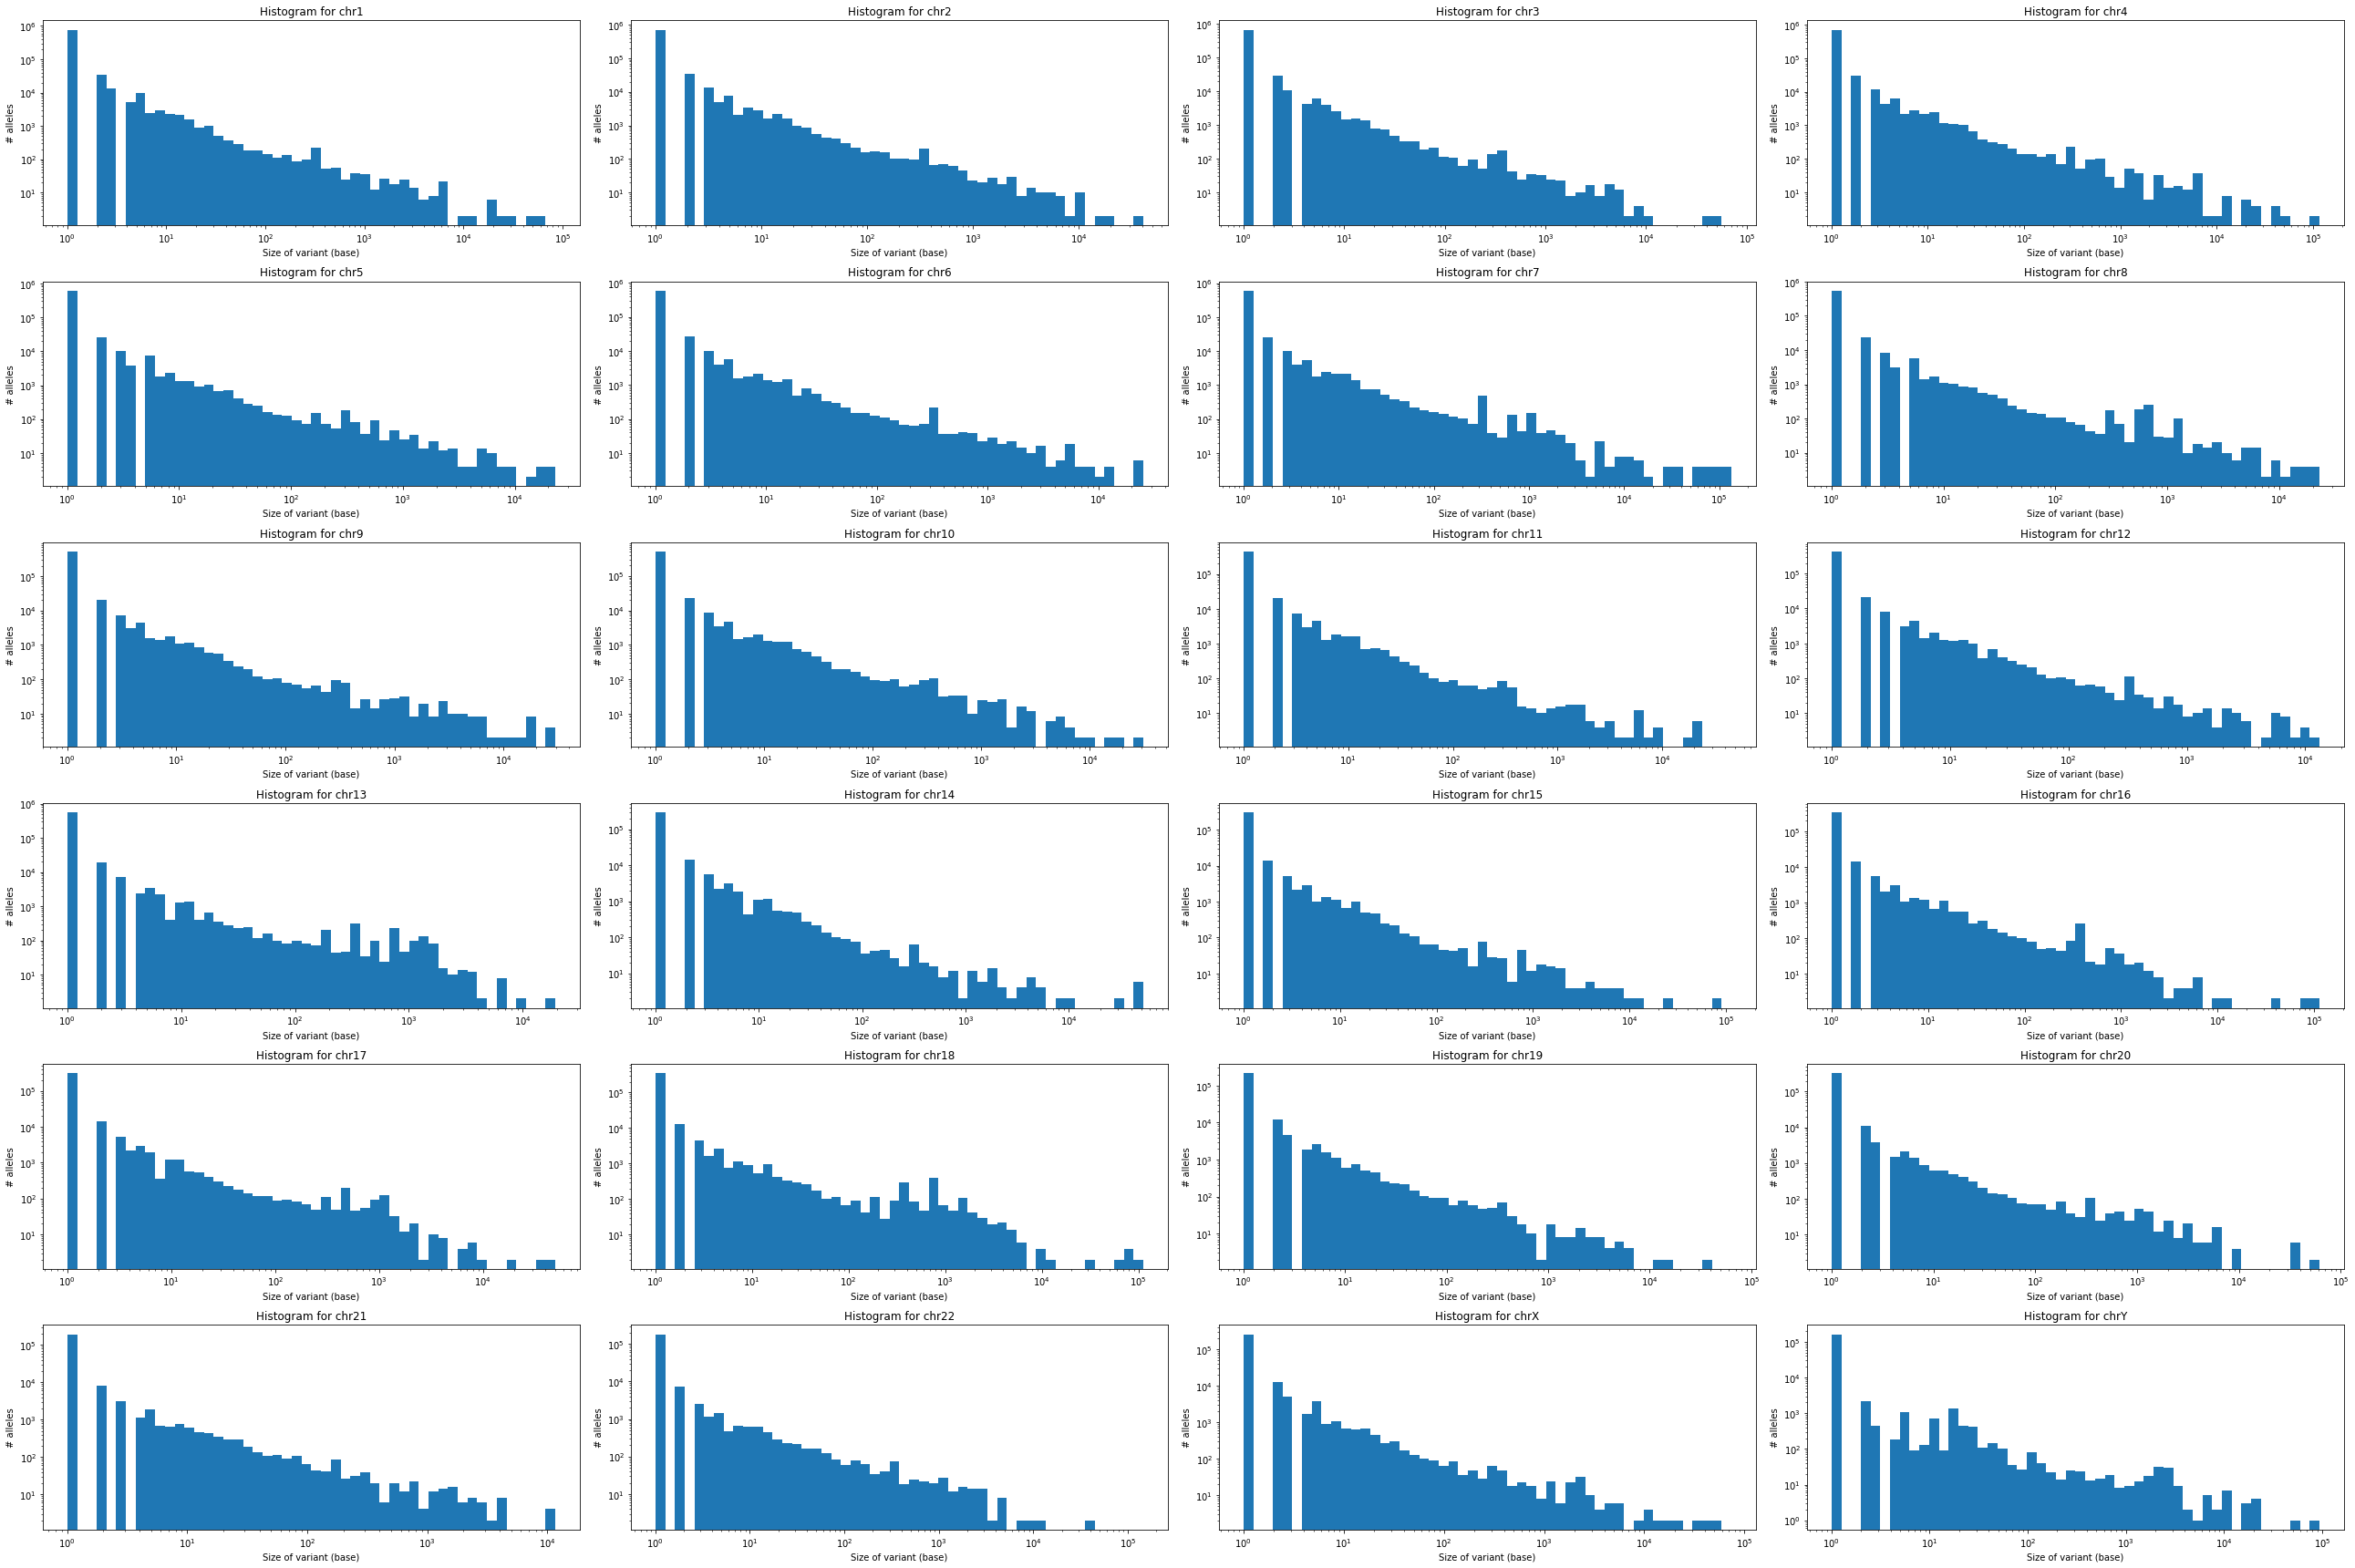

In [204]:

dim1=6
dim2=4

fig = plt.figure(figsize=(dim1*6,dim2*6))
for chrom_idx in range(len(var_size_list_chroms)):
    
    var_size_list_chrom = var_size_list_chroms[chrom_idx]
    plt.subplot(dim1, dim2, chrom_idx+1 )

    hist, bins = np.histogram(var_size_list_chrom, bins=50)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(var_size_list_chrom, bins=logbins)
    plt.xscale('log')
    plt.yscale('log')

    plt.title('Histogram for '+str(chrom_list[chrom_idx]))
    plt.xlabel("Size of variant (base)")
    plt.ylabel("# alleles")

#plt.show()
plt.tight_layout() 
plt.savefig(folder+"hist_chrs_variant_size3.pdf")